# Group 3 - Python Project 

The dataset contains an airline passenger satisfaction survey. Our goals is to understand what features drive customer satisfaction and use machine learning techniques to predict that satisfaction.

Columns:
* Unnamed: 0 : count
* ID: passenger ID
* Gender: Female or Male
* Customer Type: Loyal customer or disloyal customer
* Age: age
* Type of Travel: Personal Travel or Business Travel
* Class: Business, Eco or Eco Plus
* Flight distance: distance
* Departure/Arrival time convenient: Satisfaction level of departure/arrival time convenient
* Departure Delay in Minutes: Minutes delayed when departure
* Arrival Delay in Minutes: Minutes delayed when Arrival
* Satisfaction: Airline satisfaction level (Satisfaction or neutral/dissatisfaction)

Satisfaction Levels on a Scale of 1-5 (0 = Not Applicable)
* Inflight wifi service
* Ease of Online booking
* Gate location
* Food and drink
* Online boarding
* Seat comfort
* Inflight entertainment
* On-board service
* Leg room service
* Baggage handling
* Check-in service
* Inflight service
* Cleanliness

In [1]:
import pandas as pd
import numpy as np

#used to visualiza data
import matplotlib.pyplot as plt
import seaborn as sns

#used to scale data 
from sklearn.preprocessing import StandardScaler

#for feature selection
from sklearn.model_selection import GridSearchCV

#prediction
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load train and test data set 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Data Exploration and Preparation

In [3]:
#preview data 
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#creating a function to show unique, missign values and data type
def dataframe_describe(df):
    print('*** DataFrame description ***')
    print('The input DataFrame has', len(df), 'rows and', len(df.columns), 'columns.')
    print(" ") #space
   
    #formating the table with 30 characters for column name and : then 15 for each column 
    print('%-35s:%15s%15s%15s' % ('column name', 'unique values', 'null values', 'data type'))
    
    #for df print colunm name, unique values, null values and data type 
    for col in df.columns:
        print('%-35s:%15d%15d%15s' % (col, len(df[col].dropna().unique()),df[col].isna().sum(), df[col].dtype))

In [5]:
print(dataframe_describe(train))

*** DataFrame description ***
The input DataFrame has 103904 rows and 25 columns.
 
column name                        :  unique values    null values      data type
Unnamed: 0                         :         103904              0          int64
id                                 :         103904              0          int64
Gender                             :              2              0         object
Customer Type                      :              2              0         object
Age                                :             75              0          int64
Type of Travel                     :              2              0         object
Class                              :              3              0         object
Flight Distance                    :           3802              0          int64
Inflight wifi service              :              6              0          int64
Departure/Arrival time convenient  :              6              0          int64
Ease of Online

In [6]:
#Since we have no repetead ID values to do feature engineering using aggregated quantities, 
#We will drop it along with unnamed column - useless 
train.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [7]:
#review columns are deleted
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df = train.append(test)

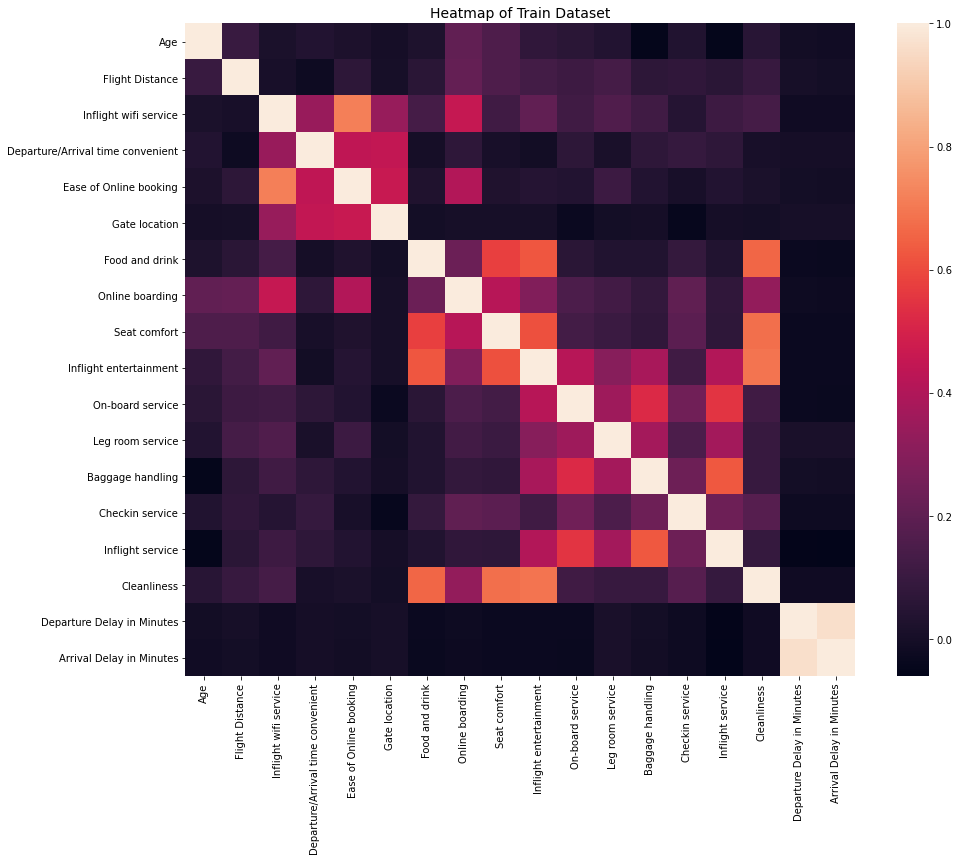

In [9]:
#Correlation Heatmap to eliminate redundant columns 
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr())
plt.title('Heatmap of Train Dataset', fontsize=14)
plt.show()

Heatmap Interpretations: 
    
Since the only highly correlated variables in the heatmap are Departure Delay in Minutes and Arrival Delay in minutes we can delete the Arrival Delay in Minutes column (which also has 310 missing values). 

In [10]:
#dropping column 
train.drop('Arrival Delay in Minutes', axis=1, inplace=True)
test.drop('Arrival Delay in Minutes', axis=1, inplace=True)

# Data Visualizations

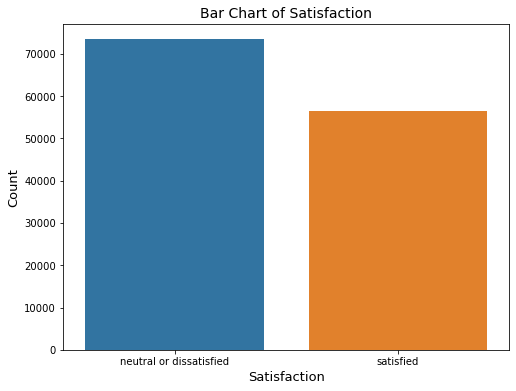

In [11]:
#Creating a plot with current satisfied and neutral/dissatisfied customers 
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='satisfaction', data=df)
plt.title('Bar Chart of Satisfaction', fontsize=14)
plt.xlabel('Satisfaction', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

# Using matplotlib - 2D and 3D plotting in Python

matplotlib object-oriented API

https://www.southampton.ac.uk/~feeg1001/notebooks/Matplotlib.html

In [12]:
#We have 4 categorical variables(Gender, Customer Type, Type of Travel, Class)
#create a column list
#removed gender since it did not reveal any insights 
categorical_cols = ['Customer Type', 'Type of Travel', 'Class']

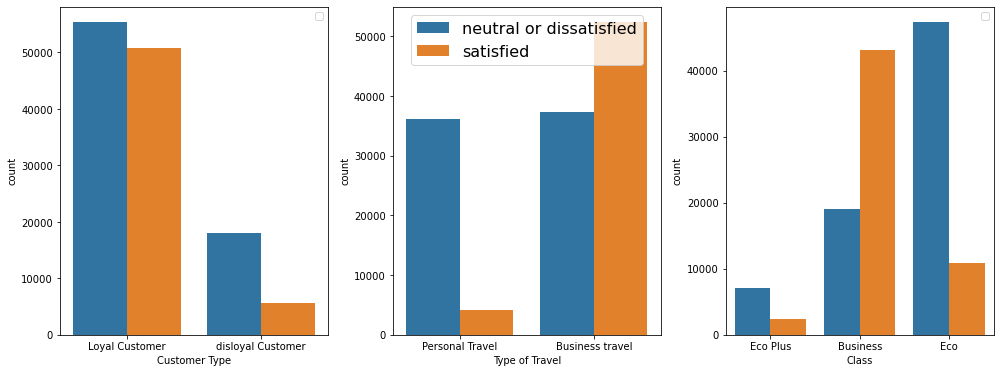

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in categorical_cols:
    
    # define location and shape of box 
    plt.subplot(2, 3, i+1)
    
    # create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = df)
    
    # remove legend
    ax.legend('')
    
    i += 1

# add legend
axs[1].legend(loc='upper center', fontsize=16)

plt.tight_layout()
plt.show()

# Data Transformation 

We need to convert variables(Gender, Customer Type, Type of Travel, Class, Satisfaction) to numeric.

In [14]:
#Checking Customer Type column factors for data transformation
print(train['Customer Type'].unique())
print(test['Customer Type'].unique())

['Loyal Customer' 'disloyal Customer']
['Loyal Customer' 'disloyal Customer']


In [15]:
#Setting up function to transform customer type column

def c_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return null

In [16]:
#Appling transformation function to the train and test dataset
train['Customer Type'] = train['Customer Type'].apply(c_type)
test['Customer Type'] = test['Customer Type'].apply(c_type)

In [17]:
#Checking if transformation on customer type column is successful
print(train['Customer Type'].unique())
print(test['Customer Type'].unique())

[1 0]
[1 0]


In [18]:
#Check Gender column factors for data transformation
print(train['Gender'].unique())
print(test['Gender'].unique())

['Male' 'Female']
['Female' 'Male']


In [19]:
#Setting up function to transform gender column
def gender(y):
    if y == 'Male':
        return 1
    elif y == 'Female':
        return 0
    else:
        return null

In [20]:
#Applying transformation function to the train and test dataset
train['Gender'] = train['Gender'].apply(gender)
test['Gender'] = test['Gender'].apply(gender)

In [21]:
#Checking if transformation on gender column is successful
print(train['Gender'].unique())
print(test['Gender'].unique())

[1 0]
[0 1]


In [22]:
#Checking Class column factors for data transformation
print(train['Class'].unique())
print(test['Class'].unique())

['Eco Plus' 'Business' 'Eco']
['Eco' 'Business' 'Eco Plus']


In [23]:
#Setting up function to transform class column
def class_type(z):
    if z == 'Eco Plus':
        return 1
    elif z == 'Business':
        return 0
    elif z == 'Eco':
        return 2
    else:
        return null

In [24]:
#Applying transformation function to the train and test dataset
train['Class'] = train['Class'].apply(class_type)
test['Class'] = test['Class'].apply(class_type)

In [25]:
#Checking if transformation on Class column is successful
print(train['Class'].unique())
print(test['Class'].unique())

[1 0 2]
[2 0 1]


In [26]:
#Checking Type of Travel column factors for data transformation
print(train['Type of Travel'].unique())
print(test['Type of Travel'].unique())

['Personal Travel' 'Business travel']
['Business travel' 'Personal Travel']


In [27]:
#Set up function to transform Type of Travel column
def travel(m):
    if m == 'Personal Travel':
        return 1
    elif m == 'Business travel':
        return 0
    else:
        return null

In [28]:
#Applying transformation function to the train and test dataset
train['Type of Travel'] = train['Type of Travel'].apply(travel)
test['Type of Travel'] = test['Type of Travel'].apply(travel)

In [29]:
#Checking if transformation on Type of Travel column is successful
print(train['Type of Travel'].unique())
print(test['Type of Travel'].unique())

[1 0]
[0 1]


In [30]:
#Check satisfaction column factors for data transformation
print(train['satisfaction'].unique())
print(test['satisfaction'].unique())

['neutral or dissatisfied' 'satisfied']
['satisfied' 'neutral or dissatisfied']


In [31]:
#Setting up function to transform satisfaction column
def sat(n):
    if n == 'neutral or dissatisfied':
        return 1
    elif n == 'satisfied':
        return 0
    else:
        return null

In [32]:
#Applying transformation function to the train and test dataset
train['satisfaction'] = train['satisfaction'].apply(sat)
test['satisfaction'] = test['satisfaction'].apply(sat)

In [33]:
#Checking if data transformation was successful
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,1,52,0,2,160,5,4,3,4,...,3,5,5,5,5,2,5,5,50,0
1,0,1,36,0,0,2863,1,1,3,1,...,5,4,4,4,4,3,4,5,0,0
2,1,0,20,0,2,192,2,0,2,4,...,2,2,4,1,3,2,2,2,0,1
3,1,1,44,0,0,3377,0,0,0,2,...,4,1,1,1,1,3,1,4,0,0
4,0,1,49,0,2,1182,2,3,4,3,...,2,2,2,2,2,4,2,4,0,0


In [34]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,1,13,1,1,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,1
1,1,0,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,1
2,0,1,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0
3,0,1,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,1
4,1,1,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0


# Scaling the Data 

In [35]:
#Age, flight distance and departure delay in minutes columns have data that has
# a way wider range, which requires scaling.
cols =['Age', 'Flight Distance', 'Departure Delay in Minutes']
train_cols = train[cols]
test_cols = test[cols]

In [36]:
#Applying scaler on these columns in train and test datasets
scaler1 = StandardScaler()
scaled_train = pd.DataFrame(scaler1.fit_transform(train_cols), columns = train_cols.columns)
scaled_test = pd.DataFrame(scaler1.fit_transform(test_cols), columns = test_cols.columns)

In [37]:
#Checking if scaling was successful
scaled_train

,Age,Flight Distance,Departure Delay in Minutes
0,-1.745279,-0.731539,0.266393
1,-0.951360,-0.957184,-0.361375
2,-0.885200,-0.047584,-0.387532
3,-0.951360,-0.629246,-0.099805
4,1.430397,-0.978244,-0.387532
...,...,...,...
103899,-1.083680,-1.000307,-0.309061
103900,0.636478,1.160869,-0.387532
103901,-0.620561,0.807860,-0.204433
103902,-1.149840,-0.189991,-0.387532


In [38]:
#Overwite the scaled data on original train and test data.
train[cols] = scaled_train
test[cols] = scaled_test
#Check if scaling was successful
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,1,0.817887,0,2,-1.035171,5,4,3,4,...,3,5,5,5,5,2,5,5,0.953810,0
1,0,1,-0.239238,0,0,1.671443,1,1,3,1,...,5,4,4,4,4,3,4,5,-0.382286,0
2,1,0,-1.296363,0,2,-1.003128,2,0,2,4,...,2,2,4,1,3,2,2,2,-0.382286,1
3,1,1,0.289325,0,0,2.186131,0,0,0,2,...,4,1,1,1,1,3,1,4,-0.382286,0
4,0,1,0.619676,0,2,-0.011804,2,3,4,3,...,2,2,2,2,2,4,2,4,-0.382286,0


In [39]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,1,-1.745279,1,1,-0.731539,3,4,3,1,...,5,5,4,3,4,4,5,5,0.266393,1
1,1,0,-0.951360,0,0,-0.957184,3,2,3,3,...,1,1,1,5,3,1,4,1,-0.361375,1
2,0,1,-0.885200,0,0,-0.047584,2,2,2,2,...,5,5,4,3,4,4,4,5,-0.387532,0
3,0,1,-0.951360,0,0,-0.629246,2,5,5,5,...,2,2,2,5,3,1,4,2,-0.099805,1
4,1,1,1.430397,0,0,-0.978244,3,3,3,3,...,5,3,3,4,4,3,3,3,-0.387532,0


In [40]:
#we no longer have missing values and converted or data to numerical 
print(dataframe_describe(train))

*** DataFrame description ***
The input DataFrame has 103904 rows and 22 columns.
 
column name                        :  unique values    null values      data type
Gender                             :              2              0          int64
Customer Type                      :              2              0          int64
Age                                :             75              0        float64
Type of Travel                     :              2              0          int64
Class                              :              3              0          int64
Flight Distance                    :           3802              0        float64
Inflight wifi service              :              6              0          int64
Departure/Arrival time convenient  :              6              0          int64
Ease of Online booking             :              6              0          int64
Gate location                      :              6              0          int64
Food and drink

# Feature Selection 

Random Forest Classifier

In [41]:
X_train = train.drop(['satisfaction'], axis=1)
y_train = train['satisfaction']
X_test = test.drop(['satisfaction'], axis=1)
y_test = test['satisfaction']

In [42]:
RSEED = 10

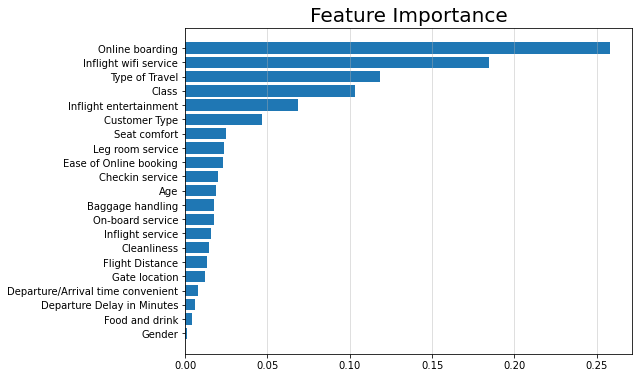

In [43]:
rf = RandomForestClassifier(random_state=RSEED)

parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [10, 80],
    'max_features': [5, 10]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10, n_jobs=-1)

# fit estimator
grid_search.fit(X_train, y_train)

# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(X_train, y_train).feature_importances_, 
                   index=X_train.columns, columns=['Importance']).sort_values('Importance')

plt.figure(figsize=(8, 6))
plt.barh(range(0, len(imp)), imp['Importance'])
plt.grid(axis='x', alpha=0.5)
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=20)
plt.show()

# Satisfaction Prediction

1. Logistic Regression 

In [44]:
def fit_predict(X_train, X_test, y_train, model, parameters_grid):
    
    # define grid search
    grid_search = GridSearchCV(estimator=model, param_grid=parameters_grid, cv=10, n_jobs=-1)
    
    # fit estimator
    grid_search.fit(X_train, y_train)
    
    # get best estimator
    best = grid_search.best_estimator_
    
    # predict
    y_pred = best.predict(X_test)
    
    return y_pred, grid_search

In [45]:
 def get_class_metrics(y_test, y_pred):
  
    # calculate accuracy and f1-score
    acc = round(accuracy_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    scores = [acc, f1]
    
    # Get confusion matrix
    mat = confusion_matrix(y_test, y_pred)
    
    # create confusion matrix
    sns.heatmap(mat, annot=True, fmt='d')
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)
    plt.title('Confusion Matrix', fontsize=14)
    
    return scores, plt

In [46]:
def display_df(scores, model):
    df = pd.DataFrame(scores).T
    df = df.rename(index={0: model}, columns={0: 'Accuracy', 1: 'F1 Score'})
    return(df)

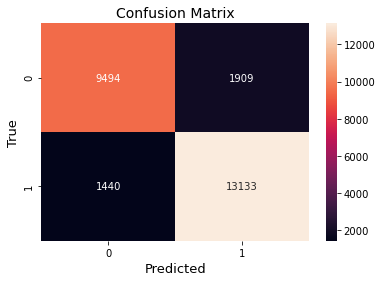

In [47]:
log = LogisticRegression(fit_intercept=True, max_iter=1000, random_state=RSEED)

parameters_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, log, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [48]:
log_res = display_df(scores, 'Logistic Regression')
log_res

,Accuracy,F1 Score
Logistic Regression,0.871,0.887


2. Random Forest Classifier 

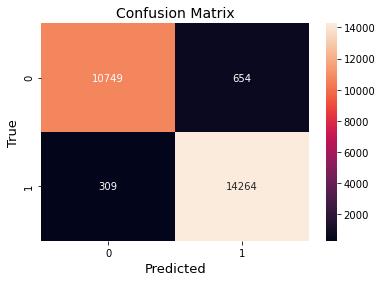

In [49]:
rf = RandomForestClassifier(random_state=RSEED)

parameters_grid = {
    'max_depth': [5, 15],
    'min_samples_leaf': [2, 8],
    'n_estimators': [10, 80],
    'max_features': [5, 10]
}

# get predictions
y_pred, grid_search = fit_predict(X_train, X_test, y_train, rf, parameters_grid)

# calculate metrics
scores, mat = get_class_metrics(y_test, y_pred)

In [50]:
rfc_res = display_df(scores, 'Random Forest Classifier')
rfc_res

,Accuracy,F1 Score
Random Forest Classifier,0.963,0.967
